# init

In [2]:
import sys 
sys.path.append('pyfiles/')
import classes_loop as cl
import parametrics as par
# so we don't have to reboot kernel every time we modify classes.py
%load_ext autoreload
%autoreload 2

# math stuff
import numpy as np
import math
# visualization
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.ndimage import gaussian_filter1d
from scipy.spatial import distance
from scipy.stats import qmc
from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline
# # sliders
# from ipywidgets import interactive

# # for matrix import and display
# import pandas as pd
# from IPython.display import display_html 
import csv 

# # to time things
# import time
# for removing punctuation from str
import string

# for polygon grid
from matplotlib.path import Path as mplPath

######## NOTE: from this point on, order is important. 
# it would be good to make the code more robust, but right
# now, there are ordered dependencies between functions.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## regular grid

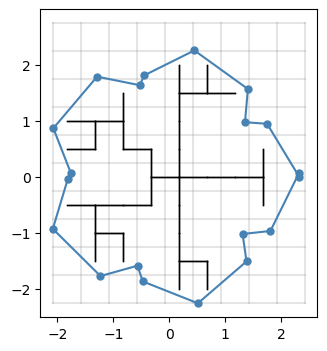

approx length of med ax:  17.5


In [4]:
############################
# CONTROL PARAMETERS # 
############################

name = 'rose'
n = 20
# NOTE: eps has different meaning for use_distknee and not
# higher is more pruned in both
e = 1
# 0.8 is default
g = .5
# these shift the grid over
x_shift = 0
y_shift = 0
pts = par.hypotrochoid_example(numpts = n, display = False)

medaxdim = 0
# true means we use comparison of distance and eps is multiplier
# false means we use eps-nearest neighbor
use_dist = True

gridon = False
makevor = False

#############################
# ISSUE: distance in use_dist is euclidean, not geodesic
# lower left corner
poisson_intensity = None
radius = None
textboxcoords = [.5, .55]

filename = cl.generate_filename(n, e, g, x_shift, 
                                y_shift, name, medaxdim, use_dist, 
                                poisson_intensity, radius)
# testpoint tests a manually entered grid point and 
# spits out the info about it for debugging, but only if testpoint is True
# make medial axis
cl.make_medial_axis(numpts = n, epsilon = e, grid_density = g, 
                    inputpts = pts, design = name, axis = medaxdim, drawgrid = gridon,
                    savefig = True, figsavename = filename,
                    x_bump = x_shift, y_bump = y_shift, plotpoints = False, 
                    textboxcoords = textboxcoords, textboxon = False,
                    testpointinfo = (2, -0.5), testpoint = False,
                    use_distknee = use_dist)

# NOTE: newest addition, usedistknee, still needs to be tested to make sure it's right
# use with caution
# make voronoi
if makevor:
    vor = Voronoi(pts)
    fig, ax = plt.subplots()
    # plot voronoi stuff
    ax.set_aspect('equal')
    fig2 = voronoi_plot_2d(vor, ax, show_vertices=True, 
                    line_alpha = 1, show_points = True, 
                    point_colors='orange', point_size=10);
    plt.savefig('./output/' + filename +'v.png', dpi = 300)

## poisson: knee is along del edge; plot vor

0.22360679774997896 5 (13, 2)
progress: 1 out of 11 | total time elapsed: 0.0 sec
progress: 2 out of 11 | total time elapsed: 0.01 sec
progress: 3 out of 11 | total time elapsed: 0.02 sec
progress: 4 out of 11 | total time elapsed: 0.04 sec
progress: 5 out of 11 | total time elapsed: 0.05 sec
progress: 6 out of 11 | total time elapsed: 0.06 sec
progress: 7 out of 11 | total time elapsed: 0.06 sec
progress: 8 out of 11 | total time elapsed: 0.07 sec
progress: 9 out of 11 | total time elapsed: 0.08 sec
progress: 10 out of 11 | total time elapsed: 0.09 sec


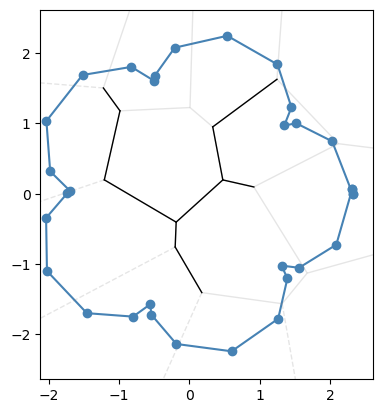

length of med ax:  6.9512914944102135


In [5]:
# control parameters 
# note to self: we control poisson seed for reproducability.
# it could also be a param here, or released to go randomly.
name = 'rose'
n = 30
epsilon = 1
inputt = par.hypotrochoid_example(numpts = n, display = False);
poisson_intensity = 5
axisdim = 0
printinfo = False
use_dist_based_alg = True

####
radius = 1/(2*(math.sqrt(poisson_intensity)))
e = None
g = None
x_shift = None
y_shift = None
filename = cl.generate_filename(n, e, g, x_shift, 
                                y_shift, name, medaxdim, use_dist, 
                                poisson_intensity, radius)

cl.make_poisson_vor_med_ax(inputt, n, epsilon, 
                        poisson_intensity, radius, axisdim,
                        figsavename = filename, 
                        use_dist_based_alg = True, 
                        printinfo = False,textboxon = False)

## poisson: knee is along vor edge; plot del

0.22360679774997896 5 (13, 2)
progress: 1 out of 12 | total time elapsed: 0.0 sec
progress: 2 out of 12 | total time elapsed: 0.01 sec
progress: 3 out of 12 | total time elapsed: 0.03 sec
progress: 4 out of 12 | total time elapsed: 0.04 sec
progress: 5 out of 12 | total time elapsed: 0.05 sec
progress: 6 out of 12 | total time elapsed: 0.06 sec
progress: 7 out of 12 | total time elapsed: 0.08 sec
progress: 8 out of 12 | total time elapsed: 0.09 sec
progress: 9 out of 12 | total time elapsed: 0.1 sec
progress: 10 out of 12 | total time elapsed: 0.11 sec
progress: 11 out of 12 | total time elapsed: 0.12 sec
progress: 12 out of 12 | total time elapsed: 0.12 sec
length of med ax approx 8.73584300866176


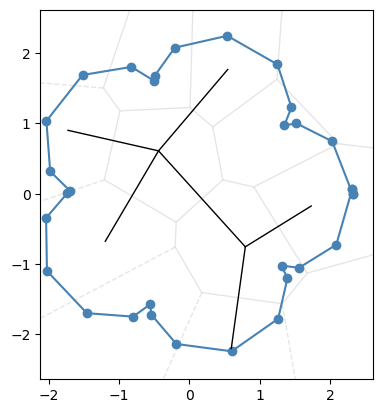

In [6]:
# control parameters 
# note to self: we control poisson seed for reproducability.
# it could also be a param here, or released to go randomly.
n = 30
epsilon = 1
inputt = par.hypotrochoid_example(numpts = n, display = False);
poisson_intensity = 5
axisdim = 0
printinfo = False
use_dist_based_alg = True

####
radius = 1/(2*(math.sqrt(poisson_intensity)))
e = None
g = None
x_shift = None
y_shift = None
filename = cl.generate_filename(n, e, g, x_shift, 
                                y_shift, name, medaxdim, use_dist, 
                                poisson_intensity, radius)

cl.make_poisson_del_med_ax(inputt, n, epsilon, 
                        poisson_intensity,radius, axisdim,
                        figsavename = filename,
                        use_dist_based_alg = True, 
                        printinfo = False,textboxon = False)

# usage reminders

## del and vor restricted to interior of shape

0.1 10 (40, 2)


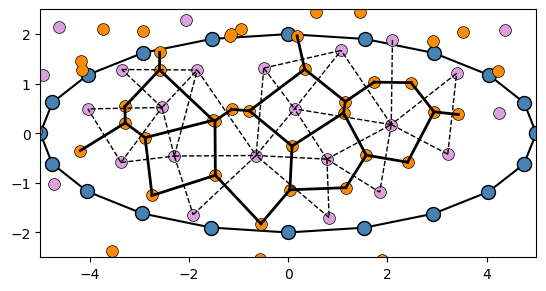

In [64]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

n = 20
inputt = par.ellipse_example(numpts = n, display = False);
poissonpts = cl.make_poisson(inputt, 10, .1, display = False);
# fake poiss points, to do approx ma
# poissonpts = inputt

# plot input pts
ax.plot(inputt[:,0], inputt[:,1], "-o" ,color = 'black', markersize = 10)
ax.plot([inputt[-1,0], inputt[0,0]],
        [inputt[-1,1], inputt[0,1]] , "-o", color = 'black', markersize = 10)
ax.plot(inputt[:,0], inputt[:,1], "o" ,color = 'steelblue', markersize = 8)
ax.plot([inputt[-1,0], inputt[0,0]],
        [inputt[-1,1], inputt[0,1]] , "o", color = 'steelblue', markersize = 8)
# only commentsed bc fake poisson
ax.plot(poissonpts[:,0], poissonpts[:,1], "o", color = 'black', markersize = 8)
ax.plot(poissonpts[:,0], poissonpts[:,1], "o", color = 'plum', markersize = 7)

vor = Voronoi(poissonpts)
#plt.plot(vor.points[:,0], vor.points[:,1], 'o', color = 'black')
ax.set_xlim(-6,6)
ax.set_ylim(-4,4)
# VOR VERTS PLOT
ax.plot(vor.vertices[:,0], vor.vertices[:,1], 'o', color = 'black', markersize = 8)
ax.plot(vor.vertices[:,0], vor.vertices[:,1], 'o', color = 'darkorange', markersize = 7)

# Determine if each vor point is inside polygon
# note: inputt means ie ellipse
# ridgepts are the verts of vor edges
inside = mplPath(inputt).contains_points(vor.vertices)

ridge_vertices = np.array(vor.ridge_vertices)
# voronoi package indexes such that -1 doesn't mean last element, 
# it means element is inf
infis0 = ridge_vertices[:,0] >= 0
infis1 = ridge_vertices[:,1] >= 0
# t/f vectors that say if the point indexed by ids is in or out
pt0inside = inside[ridge_vertices[:,0]]
pt1inside = inside[ridge_vertices[:,1]]
# indices of vertices of lines we want
ids = ridge_vertices[infis0 & infis1 & pt0inside & pt1inside]
# these are the vertices of voronoi edges which are not infinite

# these are vor verts
verts_of_inside_vor_edges = vor.vertices[ids]

for i in range(len(verts_of_inside_vor_edges)):
    x0, y0 = verts_of_inside_vor_edges[i,0]
    x1, y1 = verts_of_inside_vor_edges[i,1]
    # VORONOI PLOT
    ax.plot([x0, x1], [y0,y1], color = 'black', linewidth = 2)

# ridge pts are input pts (poisson pt pr points)
# delaunay triangulation
ridge_points = np.array(vor.ridge_points)
ids2 = ridge_points[infis0 & infis1 & pt0inside & pt1inside]

del_edges_of_good_vor_edges = vor.points[ids2]

for i in range(len(del_edges_of_good_vor_edges)):
    x0, y0 = del_edges_of_good_vor_edges[i,0]
    x1, y1 = del_edges_of_good_vor_edges[i,1]
    ## DELAUNAY PLOT
    ax.plot([x0, x1], [y0,y1], '--', color = 'black', linewidth = 1)
ax.set_xlim(-5,5)
ax.set_ylim(-2.5,2.5)
# ax.plot()
plt.savefig('./output/poisson3.png', 
                dpi = 300, pad_inches = 1)
plt.show()

## tradeoffs

## Grid based
    - size of grid
    - alignment of grid
    - density of shape sampling
    - pruning: nearest nb or distance
    - note: the grid edges are vor edges of grid
## Poisson based
    - density of sampling
    - density of shape sampling
    - pruning: nn or dist
    - drawing either vor or del edges
## Blue Poisson
    - density of sampling
    - radius 
    - density of shape sampling
    - pruning: nn or dist
    - drawing either vor or del edges
## Standard Voronoi method
    - density of shape sampling
    - (pruning, various, such as reach-based)
    - only for 0th med ax
    
## Choices (flower figures because square)
    - density of input sampling
    - (input sampling density vs pruning vs grid density) fig 5.3
    - grid choice: square or random pts
        - if square: density and alignment
        - if random: del or vor edges
        - if random: blue or regular
            if blue: radius and num of attempts
            if regular: intensity
    - pruning level
    - nearest nb or dist-based pruning

## Tradeoffs
Standard voronoi can't improve resolution if shape sampling stays the same. It can only prune. 


# next: 
- pretty pictures. would be nice to visualize birth/death
- animations?! showing growth of complext for one point, and also for moving point around
- maths stuff: be able to tell if it's a type 3 knee
- make things faster: sparse matrix
- don't store things in duplicates
- later: refinement

# ToDo: 
- would be cool: replot the graph, but labeling mothers and murderers
- also cool: make graph into an animation that shows whole process
- separate voroni MA from example and add it as a graph option
- n4 -> n3 change to reduction 
- instead of separately finding zero cols and lowest ones, save them as we smart reduce
-----

- to sell the work better: start writing down all the problems we encountered to justify why we do things this way (try to remember why phat didn't work etc) 

# Triangles will cause issues: 
- currently, knee-finding relies on only having verts and edges

- in sublime, alt shift arrows to have cursors appear all the places
- ctrl shift arrows switchy switch
- ctrl shift p to find the things